In [1]:
from sympy import *
from sympy.plotting import *
from sympy.plotting.plot import *
init_printing()

# Пример производственной функции

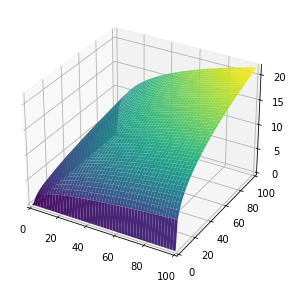

In [3]:
q,k,l=symbols('q k l',rational=True,nonnegative=True)
qlk=Eq(q,(l*k)**Rational(1,3))
plot3d(qlk.args[1],(k,0,100),(l,0,100))
# x=SurfaceOver2DRangeSeries(qlk.args[1],k-l,(k,0,100),(l,0,100))


In [4]:
var('tc')
nonlinsolve([6+1.2*l-0.01*l**2,tc-3*l],[l])

In [5]:
posify(alpha)[0]

NameError: name 'alpha' is not defined

# Аналитическое выведение функции LTC(Q)

## 1. Задание необходимых переменных

In [6]:
q,k,l=symbols('q k l',nonnegative=True,real=True) #q,k,l>=0
w,r,tc=symbols('w r tc',nonnegative=True,real=True) #w,r,tc>=0
alpha,beta=symbols("alpha beta",real=True,integer=True) #alpha,beta - СТЕПЕНИ

c=symbols('c',nonnegative=True,real=True) #ЛЯМБДА В ФУНКЦИИ ЛАГРАНЖА
L=Function('L')(k,l,c)#ФУНКЦИЯ ЛАГРАНЖА

## 2. Q(K,L) и TC(rK,wL)

In [7]:
Q=Eq(q,(l**alpha)*(k**beta)) #ПРОИЗВОДСТВЕННАЯ ФУНКЦИЯ КОББА-ДУГЛАСА
Q

In [9]:
tcc=w*l+r*k #TC(w,r,k,l)
tcc

## 3. Фунция Лагранжа

In [10]:
Eq(L,tcc+c*Q.args[1]) #ФУНКЦИЯ ЛАГРАНЖА

In [11]:
[Eq(Derivative(L,l,1),0),Eq(Derivative(L,k,1),0),Eq(Derivative(L,c,1),0)]

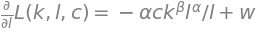

In [12]:
Eq(Derivative(L,l,1),diff(tcc,l)-c*diff(Q.args[1],l))

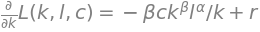

In [13]:
Eq(Derivative(L,k,1),diff(tcc,k)-c*diff(Q.args[1],k))

## 4. Выражаем лямбда из первой и второй производной

In [14]:
e1=solve(diff(tcc,l)-c*diff(Q.args[1],l),c)[0]
Eq(c,e1)

In [15]:
e2=solve(diff(tcc,k)-c*diff(Q.args[1],k),c)[0]
Eq(c,e2)

## 5. Приравниваем лямбды и выражаем L и K, чтобы получить оптимальную траекторию роста

In [16]:
e3=solve(e1-e2,l)[0]
Eq(l,e3)

In [17]:
e4=solve(e1-e2,k)[0]
Eq(k,e4)

## 6. Подставляем оптимальные K в производственную функцию

In [18]:
ee4=Q.args[1].subs(k,e4)
Eq(q,ee4)

In [19]:
ee6=Q.args[1].subs(l,e3)
ee7=powsimp(ee6,combine='exp')
Eq(q,ee7)


## 7. Упрощение

In [20]:
ee8=expand_power_base(ee7)
Eq(q,ee8)

In [21]:
ee9=powsimp(ee8,combine='exp')
Eq(q,ee9)

In [22]:
ee12=powsimp(expand_power_base(ee4),combine='exp')
Eq(l,ee12)

## 8. Выразим K и L, чтобы получить функции K(Q) и L(Q)

In [23]:
ee10=solve(ee9-q,k)[0]
ee11=expand_power_base(ee10)
Eq(k,ee11)

In [24]:
ee13=solve(ee12-q,l)[0]
ee14=expand_power_base(ee13)
Eq(l,ee14)

## 9. Получим TC(Q)

In [25]:
expand_power_base(ee11)

In [26]:
TCQ=tcc.subs([(k,ee11),(l,ee14)])
expand_power_base(TCQ)

# powsimp(TCQ,combine='exp')

# Подстановка конкретных чисел в LTC(Q)

In [52]:
expand(TCQ,deep=1,force=1)
# expand_power_base(TCQ,deep=1,force=1)
# powsimp(TCQ,deep=1,force=1,combine='exp')
LTC=symbols('LTC')
Eq(LTC,powsimp(TCQ,deep=1,force=1,combine='base'))
# powsimp(powsimp(TCQ,deep=1,force=1,combine='base'),deep=1,force=1,combine='base')
#expand(deep=True, modulus=None, power_base=True, 
#power_exp=True, mul=True, log=True, multinomial=True, basic=True, **hints)
# expand(TCQ,power_exp=0,power_base=0)
# powdenest(TCQ,force=1)


In [28]:
TCQ1=TCQ.subs([(alpha,Rational(1,6)),(beta,Rational(1,6))])
TCQ2=TCQ1.subs([(w,1),(r,1)])

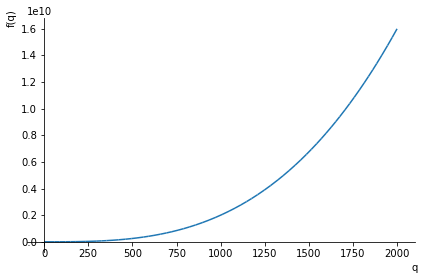

In [29]:
plot(TCQ2,(q,0,2000))
# plot(diff(TCQ2,q),(q,0,1000))
TCQ2

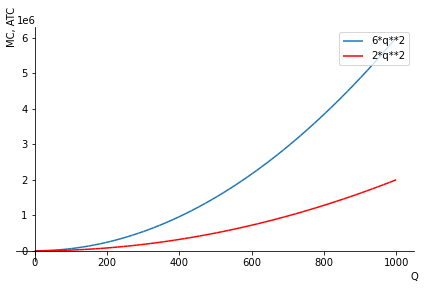

In [30]:
ATC=TCQ2/q
MC=(diff(TCQ2,q))
p1=plot(MC,ATC,(q,0,1000),show=0,legend=1,ylabel='MC, ATC',xlabel="Q")
p1[1].line_color='red'
p1.show()

# Аналитическое выведение функции STC(Q)

In [31]:
Q=Eq(q,(l**alpha)*(k**beta))#ПРОИЗВОДСТВЕННАЯ ФУНКЦИЯ КОББА-ДУГЛАСА
Q

In [32]:
tcc=w*l+r*k #TC(w,r,k,l)
tcc

In [45]:
z1=solve(Q.args[1]-q,l)[0]
Eq(l,z1)

In [46]:
z2=tcc.subs(l,z1)
Eq(tc,z2)

In [49]:
smc=symbols('smc')
Eq(smc,diff(z2,q))

In [51]:
satc=symbols("satc")
Eq(satc,z2/q)